# Step 0: Imports

In [4]:
#import packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime as dt

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Step 1: Dataset

In [5]:
# read the data set
df=pd.read_csv('wusool_data.csv')

In [25]:
# show the 1st two rows in data set
df.head(5)

,serial-number,status,city,region,NAS,FirstFlightDate,LastFlightDate,RegistrationDate
0,1,Active,ثول,Makkah,NAN,2021-04-15,2021-04-16,2021-04-12
1,2,Active,طريف,Riyadh,NAN,2021-03-02,2021-04-20,2021-03-01
2,3,InActive,NAN,Riyadh,NAN,NaT,NaT,2021-03-10
3,4,eligible,الخبر,Eastern Region,NAN,NaT,NaT,2021-03-01
4,5,Active,الحائر (امارة الرياض),Riyadh,NAN,2020-11-04,2021-04-20,2020-11-04


In [7]:
# show the informations in data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123871 entries, 0 to 123870
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   رقم تسلسلي            123871 non-null  int64 
 1   الحالة                123871 non-null  object
 2   المدينة               119594 non-null  object
 3   المنطقة               121306 non-null  object
 4   مدينة العنوان الوطني  96088 non-null   object
 5   تاريخ أول رحلة        100594 non-null  object
 6   تاريخ آخر رحلة        100594 non-null  object
 7   تاريخ التسجيل         123871 non-null  object
dtypes: int64(1), object(7)
memory usage: 7.6+ MB


# Step 2: Data cleaning & prepressing 
1- column:
- rename columns to english.
- remove white space.
- check data type.
- overwriting FirstFlightDate, LastFlightDate, RegistrationDate after changing format

2- row:
- check missing date.
- fill missing date with NAN.
- check duplicate.
- replace status data columns with:( "مستبعدة" --> "InActive","مؤهلة" --> "eligible", "فعالة" --> "Active" )
- replace each region to english

In [8]:
df.columns

Index(['رقم تسلسلي', 'الحالة', 'المدينة', 'المنطقة', 'مدينة العنوان الوطني',
       'تاريخ أول رحلة', 'تاريخ آخر رحلة', 'تاريخ التسجيل'],
      dtype='object')

In [9]:
df.shape

(123871, 8)

In [10]:
# rename the columns
df= df.rename(columns={
    'رقم تسلسلي':'serial-number',
    'الحالة':'status',
    'المدينة':'city',
    'المنطقة':'region',
    'مدينة العنوان الوطني':'NAS',
    'تاريخ أول رحلة':'FirstFlightDate',
    'تاريخ آخر رحلة':'LastFlightDate',
    'تاريخ التسجيل':'RegistrationDate'})



In [11]:
df.columns

Index(['serial-number', 'status', 'city', 'region', 'NAS', 'FirstFlightDate',
       'LastFlightDate', 'RegistrationDate'],
      dtype='object')

In [12]:
#remove white space.
df.columns = df.columns.str.strip()

In [13]:
#check data type
print(df.dtypes)

serial-number        int64
status              object
city                object
region              object
NAS                 object
FirstFlightDate     object
LastFlightDate      object
RegistrationDate    object
dtype: object


In [16]:
# overwriting FirstFlightDate, LastFlightDate, RegistrationDate after changing format
df["FirstFlightDate"]= pd.to_datetime(df["FirstFlightDate"])
df["LastFlightDate"]= pd.to_datetime(df["LastFlightDate"])
df["RegistrationDate"]= pd.to_datetime(df["RegistrationDate"])

In [17]:
#check missimg date.
df.isna().sum()

serial-number           0
status                  0
city                 4277
region               2565
NAS                 27783
FirstFlightDate     23277
LastFlightDate      23277
RegistrationDate        0
dtype: int64

In [18]:
#fill missing date with 0.
df = df.fillna("NAN")
df.isna().sum()

serial-number           0
status                  0
city                    0
region                  0
NAS                     0
FirstFlightDate     23277
LastFlightDate      23277
RegistrationDate        0
dtype: int64

In [19]:
#check duplicate.
df.duplicated().sum()

0

In [20]:
#replace "مستبعدة" with "InActive"
#replace "مؤهلة" with "eligible"
#replace "فعالة" with "Active"

df['status']=df["status"].replace("مستبعدة", "InActive", regex=True)
df['status']=df["status"].replace("مؤهلة", "eligible", regex=True)
df['status']=df["status"].replace("فعالة", "Active", regex=True)


In [21]:
#replace each region to english

df['region']=df["region"].replace("الباحة", "Albaha", regex=True)
df['region']=df["region"].replace("الجوف", "Aljoof", regex=True)
df['region']=df["region"].replace("الحدود الشمالية", "Northern borders", regex=True)
df['region']=df["region"].replace("الرياض", "Riyadh", regex=True)
df['region']=df["region"].replace("القصيم", "Al-Qassim", regex=True)
df['region']=df["region"].replace("المدينة المنورة", "Medina", regex=True)
df['region']=df["region"].replace("تبوك", "Tabuk", regex=True)
df['region']=df["region"].replace("المنطقة الشرقية", "Eastern Region", regex=True)
df['region']=df["region"].replace("جازان", "jazan", regex=True)
df['region']=df["region"].replace("حائل", "Hail", regex=True)
df['region']=df["region"].replace("عسير", "Assir", regex=True)
df['region']=df["region"].replace("مكة المكرمة", "Makkah", regex=True)
df['region']=df["region"].replace("نجران", "Najran", regex=True)


In [23]:
print("The Dimension of orignal DF is: ",df.shape)

The Dimension of orignal DF is:  (123871, 8)


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123871 entries, 0 to 123870
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   serial-number     123871 non-null  int64         
 1   status            123871 non-null  object        
 2   city              123871 non-null  object        
 3   region            123871 non-null  object        
 4   NAS               123871 non-null  object        
 5   FirstFlightDate   100594 non-null  datetime64[ns]
 6   LastFlightDate    100594 non-null  datetime64[ns]
 7   RegistrationDate  123871 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(1), object(4)
memory usage: 7.6+ MB


In [26]:
df.head()

,serial-number,status,city,region,NAS,FirstFlightDate,LastFlightDate,RegistrationDate
0,1,Active,ثول,Makkah,NAN,2021-04-15,2021-04-16,2021-04-12
1,2,Active,طريف,Riyadh,NAN,2021-03-02,2021-04-20,2021-03-01
2,3,InActive,NAN,Riyadh,NAN,NaT,NaT,2021-03-10
3,4,eligible,الخبر,Eastern Region,NAN,NaT,NaT,2021-03-01
4,5,Active,الحائر (امارة الرياض),Riyadh,NAN,2020-11-04,2021-04-20,2020-11-04


# Step 3: EDA

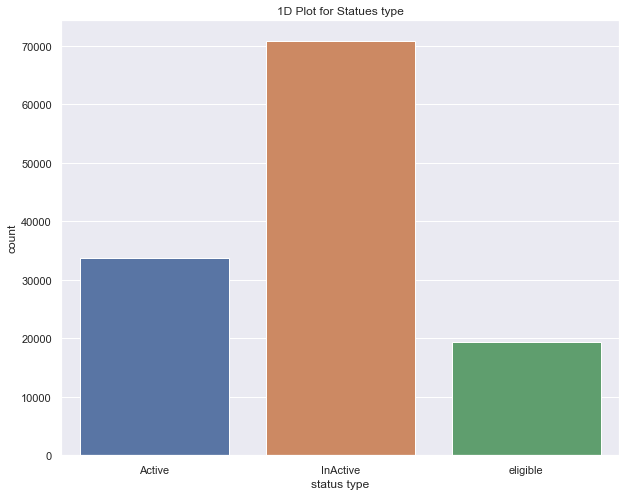

In [68]:
#1-D chart to check stutes columns 
sns.set_theme(style="darkgrid")
sns.set(rc = {'figure.figsize':(10,8)})
ax=sns.countplot(x=df.status, data=df )
ax.set(xlabel="status type")
ax.set_title('1D Plot for Statues type');
#plt.xticks(rotation=90)

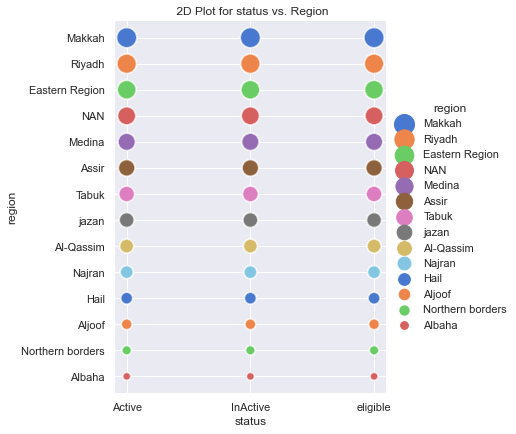

In [71]:
#2-D chart to check stutes columns with Regoin columns 
sns.set_theme(style="darkgrid")
sns.set(rc = {'figure.figsize':(10,15)})
sns.relplot(x=df.status, y=df.region,  palette="muted",
         height=6, data=df ,size="region",
            sizes=(60, 400), alpha=.5).set(title=' 2D Plot for status vs. Region')

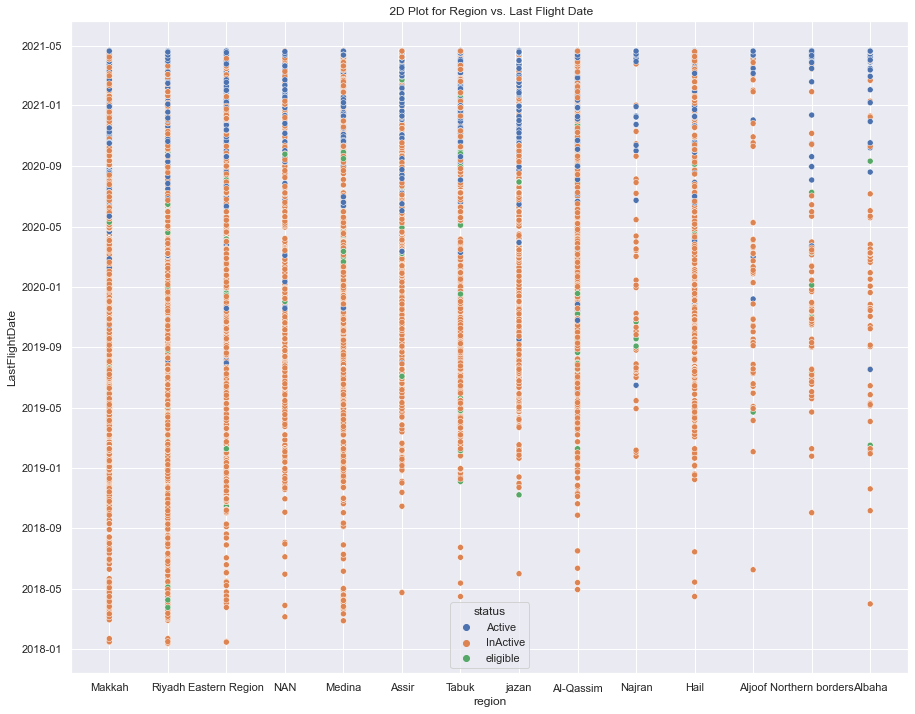

In [112]:
#2-D chart to check region columns with LastFlightDate columns 
sns.set_theme(style="darkgrid")
sns.set(rc = {'figure.figsize':(15,12)})
sns.scatterplot(data = df, x = df.region, y =  df.LastFlightDate ,hue="status")
.set(title=' 2D Plot for Region vs. Last Flight Date')
plt.show()

# Step 4: Modelling

In [39]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

#split dataset in features and target variable
feature_cols = ['serial-number', 'city', 'region','NAS','FirstFlightDate','LastFlightDate','RegistrationDate']
X = df[feature_cols] # Features
y = df.status # Target variable
                
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [50]:
X_train

,serial-number,city,region,NAS,FirstFlightDate,LastFlightDate,RegistrationDate
30233,30234,القطيف,Eastern Region,القطيف,2020-03-02,2020-09-05,2020-02-16
58587,58588,الدوادمي,Riyadh,NAN,2019-02-19,2021-04-20,2020-11-23
17522,17523,NAN,NAN,NAN,2020-12-20,2021-03-30,2020-12-17
53595,53596,الدمام,Eastern Region,الدمام,2018-12-02,2019-04-23,2018-11-27
96576,96577,NAN,NAN,البدائع,2019-05-16,2019-12-31,2019-10-14
...,...,...,...,...,...,...,...
121676,121677,جدة,Makkah,جدة,2019-09-05,2019-12-07,2019-09-02
45538,45539,الهمجة,Riyadh,الهفوف,NaT,NaT,2021-02-19
61409,61410,الرياض,Riyadh,الرياض,2019-06-20,2020-03-17,2019-06-10
110100,110101,جدة,Makkah,جدة,2019-10-28,2020-03-08,2019-10-20


In [51]:
X_test

,serial-number,city,region,NAS,FirstFlightDate,LastFlightDate,RegistrationDate
56956,56957,جدة,Makkah,جدة,2019-11-06,2020-03-20,2019-11-04
96010,96011,الرياض,Riyadh,مكة المكرمة,2019-04-18,2021-04-20,2019-06-08
105042,105043,الدمام,Eastern Region,الدمام,2019-06-20,2020-08-25,2019-05-24
11604,11605,طريف,Riyadh,NAN,2020-11-20,2020-11-20,2020-11-19
79291,79292,جدة,Makkah,جدة,2019-01-29,2019-07-18,2019-01-19
...,...,...,...,...,...,...,...
66930,66931,ابها,Assir,آل حديلة,NaT,NaT,2020-01-25
116862,116863,الرياض,Riyadh,الرياض,2019-05-16,2020-04-05,2019-04-20
87206,87207,الوجه,Tabuk,NAN,2021-01-12,2021-03-25,2020-12-07
37253,37254,المسجد,Riyadh,NAN,NaT,NaT,2021-01-16


In [52]:
y_train

30233       Active
58587       Active
17522       Active
53595     InActive
96576     InActive
            ...   
121676    InActive
45538     eligible
61409     InActive
110100    InActive
100478    InActive
Name: status, Length: 86709, dtype: object

In [53]:
y_test

56956     InActive
96010     InActive
105042      Active
11604     InActive
79291     InActive
            ...   
66930     eligible
116862    InActive
87206       Active
37253     eligible
39930     InActive
Name: status, Length: 37162, dtype: object

# 1- using Decision Tree Model

In [40]:
from numpy import mean
from numpy import std

# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
# define the model
model = DecisionTreeClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
DT_n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# report performance
DT_Accuracy = (mean(DT_n_scores), std(DT_n_scores))
print('Accuracy: %.3f (%.3f)' % DT_Accuracy)

Accuracy: 0.793 (0.045)


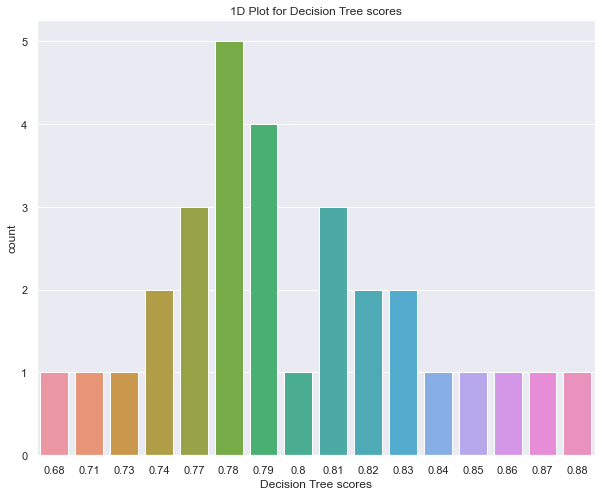

In [45]:
# Creating a bar plot
sns.set_theme(style="darkgrid")
sns.set(rc = {'figure.figsize':(10,8)})
ax=sns.countplot(x=DT_n_scores, data=df);
ax.set(xlabel="Decision Tree scores")
ax.set_title('1D Plot for Decision Tree scores');

# 2- using Random Forest Model

In [75]:
from numpy import mean
from numpy import std

# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
# define the model
model = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
RF_n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# report performance
RF_Accuracy = (mean(RF_n_scores), std(RF_n_scores))
print('Accuracy: %.3f (%.3f)' % RF_Accuracy)


Accuracy: 0.907 (0.022)


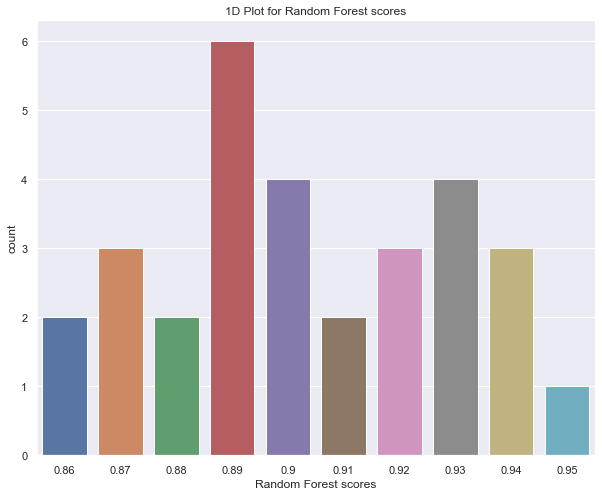

In [46]:
# Creating a bar plot
sns.set_theme(style="darkgrid")
sns.set(rc = {'figure.figsize':(10,8)})
ax=sns.countplot(x=RF_n_scores, data=df);
ax.set(xlabel="Random Forest scores")
ax.set_title('1D Plot for Random Forest scores');

# Conclusion:
Finally, we already achieved with the below goals:
- Prepare the environment
- Import all the libraries and dependencies.
- The best model using is Random Forest, based on the Accuracy.
- Detect the impact of women's driving on “WOSUL” program based on status. 
- Detect the impact of women's driving on “WOSUL” program based on status and Region. 
- Detect the impact of women's driving on “WOSUL” program based on status and Last Flight Date. 
